In [2]:
import numpy as np
from numpy.lib.function_base import cov
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

start_period = '2006-12-01'
end_period = '2019-12-31'
yesterday = '2018-12-31' # The day before making the portfolio.

from init import download_data, plot_line, plot_hist, plot_box

In [3]:
import yfinance as yf


In [4]:
yf.pdr_override() # Downloading the stock data for a specific time period. 
dataframes = download_data(stocks = ["AAPL", "NVDA", "KO", "UL", "BAC", "AXP"], start_stream = "2010-12-01", end_stream = "2019-12-31")

[*********************100%%**********************]  1 of 1 completed
Done
[*********************100%%**********************]  1 of 1 completed
Done
[*********************100%%**********************]  1 of 1 completed
Done
[*********************100%%**********************]  1 of 1 completed
Done
[*********************100%%**********************]  1 of 1 completed
Done
[*********************100%%**********************]  1 of 1 completed
Done


In [5]:
chart = pd.DataFrame()
# Adjusted closing prices.
for s in ["AAPL", "NVDA", "KO", "UL", "BAC", "AXP"]:
    chart = pd.concat([chart, dataframes[s]['Adj Close'].loc[:yesterday,]], axis = 1)
chart.columns = ["AAPL", "NVDA", "KO", "UL", "BAC", "AXP"]
chart

,AAPL,NVDA,KO,UL,BAC,AXP
2010-12-01,9.566574,3.258715,21.471247,18.090862,9.150233,36.584095
2010-12-02,9.619489,3.297702,21.537621,18.440834,9.466312,37.145638
2010-12-03,9.598019,3.391725,21.404875,18.682648,9.612199,37.063076
2010-12-06,9.679959,3.327513,21.235628,18.727194,9.433897,37.162163
2010-12-07,9.621300,3.435297,21.285402,19.134439,9.377160,36.980480
...,...,...,...,...,...,...
2018-12-24,35.187363,31.521746,39.005569,42.482101,19.984526,83.063225
2018-12-26,37.665306,33.014996,39.837276,43.448936,21.197842,87.091095
2018-12-27,37.420864,32.536251,40.337997,43.473930,21.426439,87.870689
2018-12-28,37.440033,33.151405,40.057934,43.357243,21.444019,87.629372


In [6]:
chart.tail()

,AAPL,NVDA,KO,UL,BAC,AXP
2018-12-24 00:00:00,35.187363,31.521746,39.005569,42.482101,19.984526,83.063225
2018-12-26 00:00:00,37.665306,33.014996,39.837276,43.448936,21.197842,87.091095
2018-12-27 00:00:00,37.420864,32.536251,40.337997,43.473930,21.426439,87.870689
2018-12-28 00:00:00,37.440033,33.151405,40.057934,43.357243,21.444019,87.629372
2018-12-31 00:00:00,37.801899,33.114204,40.185238,43.548950,21.663824,88.464661


In [7]:
ch = pd.DataFrame(chart) #Creating a DataFrame named 'ch' using the data from the 'chart' variable.
ch

,AAPL,NVDA,KO,UL,BAC,AXP
2010-12-01,9.566574,3.258715,21.471247,18.090862,9.150233,36.584095
2010-12-02,9.619489,3.297702,21.537621,18.440834,9.466312,37.145638
2010-12-03,9.598019,3.391725,21.404875,18.682648,9.612199,37.063076
2010-12-06,9.679959,3.327513,21.235628,18.727194,9.433897,37.162163
2010-12-07,9.621300,3.435297,21.285402,19.134439,9.377160,36.980480
...,...,...,...,...,...,...
2018-12-24,35.187363,31.521746,39.005569,42.482101,19.984526,83.063225
2018-12-26,37.665306,33.014996,39.837276,43.448936,21.197842,87.091095
2018-12-27,37.420864,32.536251,40.337997,43.473930,21.426439,87.870689
2018-12-28,37.440033,33.151405,40.057934,43.357243,21.444019,87.629372


In [8]:
# compute montly (default value = 'M') cc return 
# aggregation = "Y"
# chart_rt = {}
# for s in chart:
#     tmp = chart[s].groupby(pd.Grouper(freq = aggregation))
#     tmp2 = tmp.mean()
#     chart_rt[s] = np.log(tmp2/tmp2.shift(1))
# chart_rt = pd.DataFrame.from_dict(chart_rt)
# chart_rt = chart_rt.dropna()
# chart_rt.columns = ["AAPL CC returns", "NVDA CC returns", "KO CC returns", "UL CC returns", "BAC CC returns", "AXP CC returns"]
# chart_rt


In [9]:
chart['Date'] = chart.index # Adding a 'Date' column to the DataFrame 'chart' using the index.
chart.reset_index(inplace=True, drop=True) # Resetting the index and dropping the old index to ensure sequential indexing.


In [10]:
import pandas as pd
import numpy as np

aggregation = "Y"
chart_rt = {}

for column in chart.columns:
    if column != 'Date':
        tmp = chart[['Date', column]].groupby(pd.Grouper(key='Date', freq=aggregation)).mean()
        returns = np.log(tmp[column] / tmp[column].shift(1))
        chart_rt[column + ' returns'] = returns

# Convert the dictionary of returns data into a DataFrame
chart_rt = pd.DataFrame.from_dict(chart_rt)
chart_rt = chart_rt.dropna()
chart_rt.columns = ["AAPL CC returns", "NVDA CC returns", "KO CC returns", "UL CC returns", "BAC CC returns", "AXP CC returns"] # Rename the columns for clarity



In [11]:
chart_rt

,AAPL CC returns,NVDA CC returns,KO CC returns,UL CC returns,BAC CC returns,AXP CC returns
Date,,,,,,
2011-12-31,0.124212,0.136011,0.038071,0.065302,-0.224135,0.079486
2012-12-31,0.461452,-0.222650,0.134436,0.126912,-0.165687,0.180113
2013-12-31,-0.177950,0.066357,0.095691,0.191965,0.469109,0.276498
2014-12-31,0.336138,0.287235,0.058823,0.078054,0.198597,0.219651
2015-12-31,0.280119,0.263427,0.040229,0.050668,0.024875,-0.128881
2016-12-31,-0.117122,0.832395,0.085988,0.058334,-0.057347,-0.182817
2017-12-31,0.382806,1.030057,0.051683,0.208368,0.486005,0.300452
2018-12-31,0.242850,0.441813,0.057054,0.065574,0.199202,0.190854


In [12]:
chart_rt.index

DatetimeIndex(['2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', freq='A-DEC')

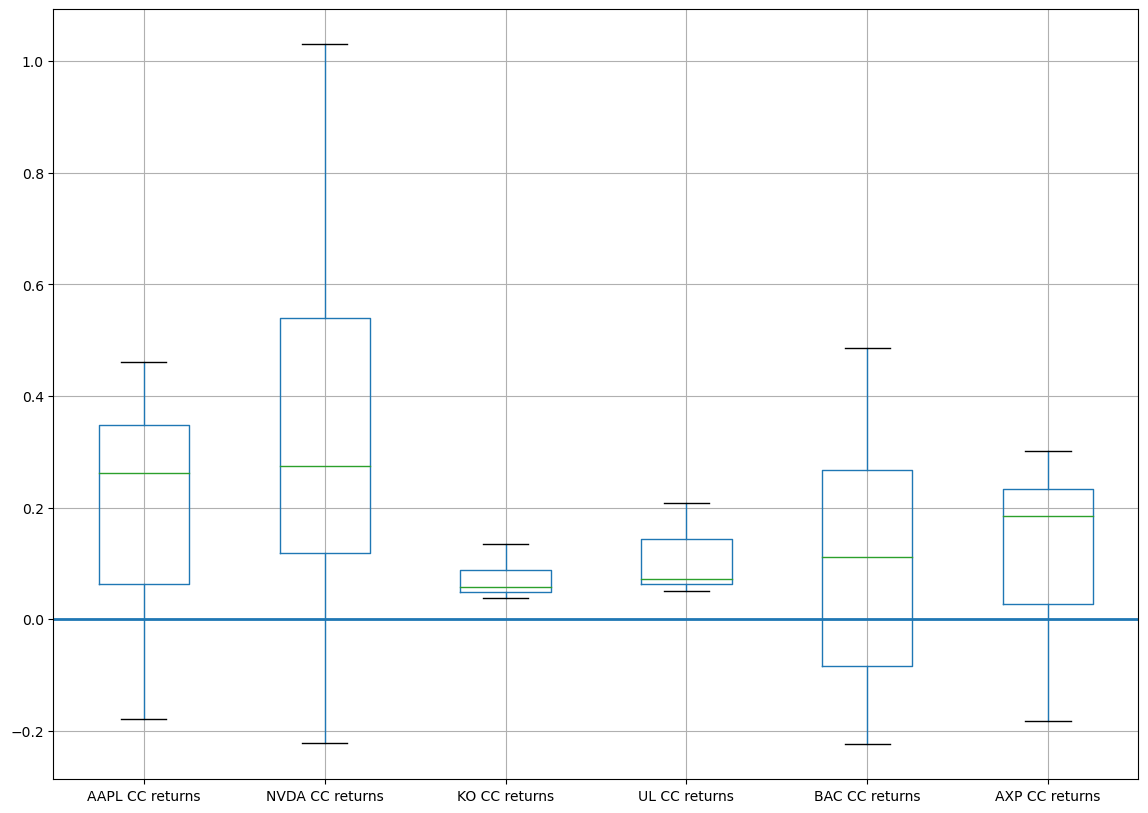

In [13]:
# Visualizing the distribution of returns for multiple stocks using a boxplot, with a horizontal line indicating the zero return level.
plt.figure(figsize = (14, 10))
chart_rt.boxplot(column=list(chart_rt.columns))
plt.axhline(y = 0, linewidth = 2)
plt.show()

In [14]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [15]:
# adding transition costs (1,5% fee per share)
chart = ch.apply(lambda x: x + (x * 0.015))

display(chart)

,AAPL,NVDA,KO,UL,BAC,AXP
2010-12-01,9.710073,3.307596,21.793315,18.362225,9.287487,37.132856
2010-12-02,9.763781,3.347167,21.860685,18.717447,9.608307,37.702822
2010-12-03,9.741989,3.442601,21.725948,18.962887,9.756382,37.619022
2010-12-06,9.825159,3.377425,21.554163,19.008102,9.575405,37.719595
2010-12-07,9.765619,3.486826,21.604683,19.421456,9.517817,37.535187
...,...,...,...,...,...,...
2018-12-24,35.715173,31.994572,39.590653,43.119333,20.284294,84.309173
2018-12-26,38.230286,33.510221,40.434836,44.100671,21.515809,88.397461
2018-12-27,37.982177,33.024295,40.943067,44.126039,21.747836,89.188750
2018-12-28,38.001633,33.648676,40.658803,44.007601,21.765680,88.943812


In [16]:
# Optimal portfolio

# computes CC return on year granularity
avg_returns = expected_returns.mean_historical_return(chart)
print('-- avg_returns: ')
print(avg_returns)
# sample covariance matrix 
S = risk_models.sample_cov(chart)
print('\n-- S: ')
display(S)
ef = EfficientFrontier(avg_returns, S)

-- avg_returns: 
AAPL    0.185689
NVDA    0.332964
KO      0.080791
UL      0.115041
BAC     0.112748
AXP     0.115665
dtype: float64

-- S: 


,AAPL,NVDA,KO,UL,BAC,AXP
AAPL,0.064703,0.035943,0.009083,0.013825,0.028224,0.018785
NVDA,0.035943,0.160866,0.012918,0.017929,0.047441,0.030523
KO,0.009083,0.012918,0.020601,0.012401,0.014334,0.012206
UL,0.013825,0.017929,0.012401,0.034871,0.018894,0.015524
BAC,0.028224,0.047441,0.014334,0.018894,0.108747,0.043085
AXP,0.018785,0.030523,0.012206,0.015524,0.043085,0.047519


Expected annual return: 10.2%
Annual volatility: 13.0%
Sharpe Ratio: 0.63

Weights:
AAPL	-> 0.10958
NVDA	-> 0.0
KO	-> 0.60802
UL	-> 0.18426
BAC	-> 0.0
AXP	-> 0.09814


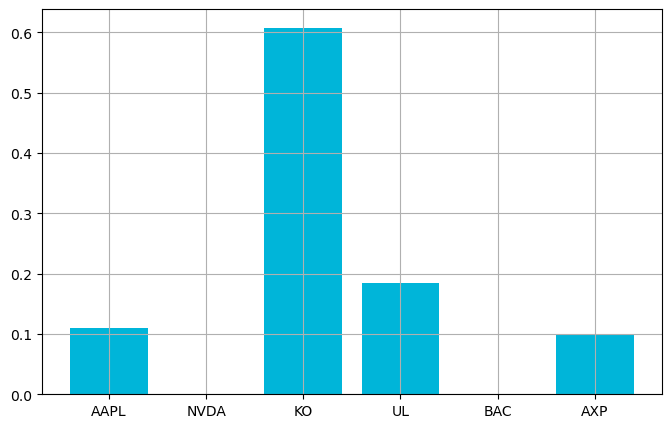

In [17]:
# Minimize the volatily of the portfolio (Markowitz)
weights = ef.min_volatility()
# rounding weights values, meaning they may not add up exactly to 1 but should be close
weights = ef.clean_weights()

Mop_pw = weights

opt_return, opt_risk, _ = ef.portfolio_performance(verbose=True)

# raw data:
# print(f'Optimal Return: {opt_return}')
# print(f'Optimal Risk: \t{opt_risk}')
# print('Weights stocks:')
print('\nWeights:')
for w in weights:
    print(w + '\t-> ' + str(weights[w]))
# print(f'Weights stocks: {weights}')


w = pd.DataFrame.from_dict(weights, orient='index')
w.columns = ['weight']
plt.figure(figsize = (8, 5))
plt.bar(w.index, w['weight'], color = '#00b5d9')
plt.grid()
# plt.savefig('img_portfolio/'+ str(0) + '-weights.png', dpi=300)
plt.show()

In [18]:
from pypfopt import cla
from pypfopt.plotting import plot_efficient_frontier

<Axes: xlabel='Volatility', ylabel='Return'>

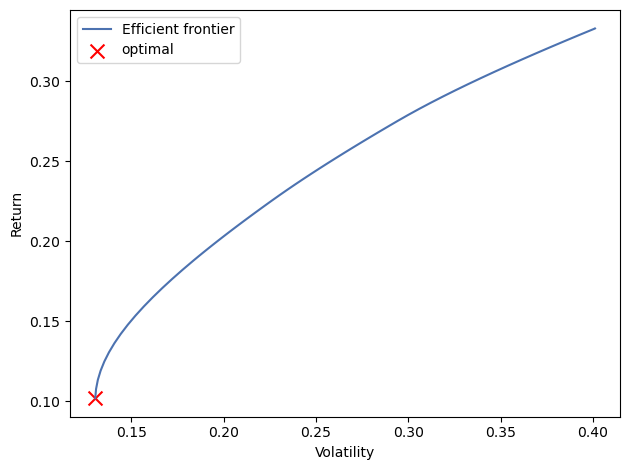

In [19]:
# Markowitz
ef = cla.CLA(avg_returns, S) 
ef.min_volatility() # Markowitz
optimal_ret, optimal_risk, _ = ef.portfolio_performance()
plot_efficient_frontier(ef, show_assets=False)
# plt.savefig('img_portfolio/'+ str(1) + '-efficient_frontier.png', dpi=300)

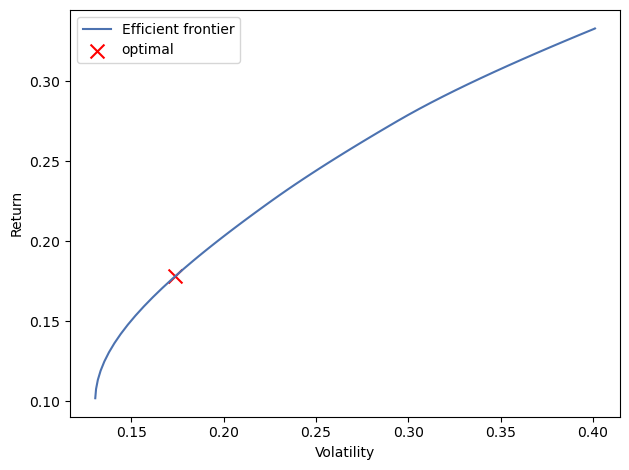

In [20]:
# Sharpe Ratio
ef = cla.CLA(avg_returns, S) 
ef.max_sharpe() # Sharpe Ratio
optimal_ret, optimal_risk, _ = ef.portfolio_performance()
plot_efficient_frontier(ef, show_assets=False)
plt.show()

In [21]:
# Compute the composition of a Markowitz portfolio.
# Determine the number of shares, price per share, transaction costs, and total investment cost for each asset.
# Calculate the total amount spent on the investment and the remaining budget.

max_budget = 10000

recap = {}

print('Composition of portfolio Markowitz: ')
for s in weights:
    recap[s] = [int(np.floor(max_budget * weights[s]/chart[s].iloc[-1]))] # number of shares
    price_no_fee = np.round(chart[s].iloc[-1] - (chart[s].iloc[-1] * 1.5 / 101.5), decimals = 2)
    recap[s].append(price_no_fee) # price for each shares
    recap[s].append(price_no_fee * 0.015) # transaction costs 1.5%
    tot_cost = np.around(recap[s][0] * (recap[s][1] + recap[s][2]), decimals = 2)
    recap[s].append(tot_cost) # total cost of the investment in s (shares * (price for each s + transaction costs))

recap = pd.DataFrame.from_dict(recap, orient='index')
recap.columns = ['Num of shares', 'Price for each share $', 'Transaction costs $', 'Purchase cost $']
display(recap)

total = 0
for _, row in recap.iterrows():
    total += row['Purchase cost $']

total = np.around(total, decimals = 2)
print('The total spent on the investment is ' + str(total) + "$")
print('You have ' + str(np.around(max_budget - total, decimals = 2))  + '$ left')

Composition of portfolio Markowitz: 


,Num of shares,Price for each share $,Transaction costs $,Purchase cost $
AAPL,28,37.80,0.56700,1074.28
NVDA,0,33.11,0.49665,0.00
KO,149,40.19,0.60285,6078.13
UL,41,43.55,0.65325,1812.33
BAC,0,21.66,0.32490,0.00
AXP,10,88.46,1.32690,897.87


The total spent on the investment is 9862.61$
You have 137.39$ left


In [22]:
# Iterates through each dataframe in the collection and prints the type of index it has.

for s in dataframes:
    index_type = dataframes[s].index
    print(f"Index type: {index_type}")
    

Index type: DatetimeIndex(['2010-12-01', '2010-12-02', '2010-12-03', '2010-12-06',
               '2010-12-07', '2010-12-08', '2010-12-09', '2010-12-10',
               '2010-12-13', '2010-12-14',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=2285, freq=None)
Index type: DatetimeIndex(['2010-12-01', '2010-12-02', '2010-12-03', '2010-12-06',
               '2010-12-07', '2010-12-08', '2010-12-09', '2010-12-10',
               '2010-12-13', '2010-12-14',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=2285, freq=None)
Index type: DatetimeIndex(['2010-12-01', '2010

In [23]:
end_period 

'2019-12-31'

In [24]:
end_period = '2019-12-30'

In [25]:
# buy and hold (1 year, from start_period to end_period = reduced a data )
# l = 12m

price_end = {}
tot_port = 0
for s in dataframes:
    price_end[s] = dataframes[s]['Adj Close'].loc[end_period]

act_return = 0
for index, row in recap.iterrows():
    tot_port += np.around(row['Num of shares'] * (price_end[index] + row['Transaction costs $']), decimals = 2)
    rtn = (price_end[index] + row['Transaction costs $'])/recap.loc[index,'Price for each share $'] - 1
    act_return += weights[index] * rtn

print('You started with ' + str(total)+ "$")
print('The investment value is now equal to ' + str(np.around(tot_port, decimals = 2)) + "$")

print('Stonks') if (total < tot_port) else print('Not stonks')


print(f'Expected return Mop:\t {opt_return} [{np.round(100*opt_return, decimals = 2)}%]')

print(f'Actual return Mop:\t {act_return} [{np.round(100*act_return, decimals = 2)}%]')


You started with 9862.61$
The investment value is now equal to 12532.37$
Stonks
Expected return Mop:	 0.10201941117812385 [10.2%]
Actual return Mop:	 0.291005372262107 [29.1%]


In [26]:
from descriptive_analytics_fun import compute_CCreturns

In [27]:
# CAPM

def beta_calc(stock, market_index):
    covariance_matrix = np.cov(stock, market_index, ddof=0)
    covariance_value = covariance_matrix[0, 1]
    beta = covariance_value / market_index.var()
    return beta

def c_beta_calc(stocks, market_index, delta_t = 18):
    length_period = market_index.shape[0] # length period for the stock's time series
    start = delta_t # default: first month after the 20 months to calculate the first value of beta
    
    

    betas = {}
    ccrs = {}
    for s in stocks:
        ccrs[s] = compute_CCreturns(dataframes[s])
        betas[s] = pd.Series(dtype = 'float64') # Filled with empty series before performing concatenation.
         
    
    

    for i in range(start, length_period):
        if i==108:
            break

        # range issue solved here by breaking the loop
        
        for s in stocks:
            value = beta_calc(ccrs[s][i - delta_t:i - 1], market_index[i - delta_t:i - 1])
            
            serie = pd.Series([value], index = ccrs[s].index[[i]])
            betas[s] = pd.concat([betas[s], serie], axis = 0)

    return betas


market_index_name = "^GSPC" 
market_index = compute_CCreturns(download_data(stocks = [market_index_name], start_stream = start_period                     )[market_index_name])
betas = c_beta_calc(["AAPL", "NVDA", "KO", "UL", "BAC", "AXP"], market_index)
betas = pd.DataFrame(betas).loc[yesterday:end_period,]


df_adj = market_index
df_adj_op = df_adj.groupby(pd.Grouper(freq = 'M'))  # aggregation (default: monthly)
df_adj = df_adj_op.mean()   # aggregate with avg
df_returns = np.log(df_adj/df_adj.shift(1)) # calculating CC returns
df_returns.name = 'market index returns'
df_returns.dropna()

rm = df_returns.loc[yesterday:end_period,].dropna().mean() * 12
# monthly aggregation -> 12 times in 1 year
er = {}
for s in betas:
    rf = 0.01 # risk free
    beta_m = betas[s].mean()
    # print(f'The mean of beta for {s} is {}')
    # er = rm + (beta_m * (rm-rf))
    er[s] = beta_m * (rm - rf) + rm
    print(f'Expected return based on CAPM for {s} is {er[s]}')

# simulating portfolio returns on CAPM predictions
sim_capm = 0
for w in weights:
    sim_capm += er[w] * weights[w]

print(f'\nExpected portfolio return based on CAPM: {sim_capm}')

[] downloading ^GSPC	 -> 

[*********************100%%**********************]  1 of 1 completed
Done
Expected return based on CAPM for AAPL is 4.716008375964541
Expected return based on CAPM for NVDA is 2.431482573898391
Expected return based on CAPM for KO is 10.342771244419382
Expected return based on CAPM for UL is 8.780994274531569
Expected return based on CAPM for BAC is 8.373644866212553
Expected return based on CAPM for AXP is 11.32263676857719

Expected portfolio return based on CAPM: 9.53458154736342


c:\Users\maana\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
